## H2D2 Spectroscopy 
-------------------------------

James Amidei, Zach Stedman, And Max Markgraf 

In [1]:
import numpy as np 
import pylab as py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats

def fgaussian(x, A, B, C, D):
    return A * np.exp(-((x - B) ** 2) / (2 * C ** 2)) + D

def ftwogaussian(x, A1, A2, B1, B2, C1, C2, D):
    return (A1 * np.exp(-((x - B1) ** 2) / (2 * C1 ** 2)) 
            + A2 * np.exp(-((x - B2) ** 2) / (2 * C2 ** 2)) + D)

def is_float(string): 
    try:
        float(string)
        return True
    except ValueError:
        return False

# pull data 
#data1 = np.genfromtxt('MercuryData.csv', delimiter=',', skip_header=22, dtype=str)
datam = np.genfromtxt('DataFiles/MercuryData.csv', delimiter=',', dtype=str)
datam_copy = np.genfromtxt('DataFiles/MercuryDataCopy.csv', delimiter=',', dtype=str)

data1 =  np.genfromtxt('DataFiles/H2D2Data1.csv', delimiter=',', dtype=str)
data1_peak1 =  np.genfromtxt('DataFiles/H2D2Data1Peak1.csv', delimiter=',', dtype=str)
data1_peak2 =  np.genfromtxt('DataFiles/H2D2Data1Peak2.csv', delimiter=',', dtype=str)

data2 =  np.genfromtxt('DataFiles/H2D2Data2.csv', delimiter=',', dtype=str)
data2_peak1 =  np.genfromtxt('DataFiles/H2D2Data2Peak1.csv', delimiter=',', dtype=str)
data2_peak2 =  np.genfromtxt('DataFiles/H2D2Data2Peak2.csv', delimiter=',', dtype=str)

data3 =  np.genfromtxt('DataFiles/H2D2Data3.csv', delimiter=',', dtype=str)
data3_peak1 =  np.genfromtxt('DataFiles/H2D2Data3Peak1.csv', delimiter=',', dtype=str)
data3_peak2 =  np.genfromtxt('DataFiles/H2D2Data3Peak2.csv', delimiter=',', dtype=str)

data4 =  np.genfromtxt('DataFiles/H2D2Data4.csv', delimiter=',', dtype=str)
data4_peak1 =  np.genfromtxt('DataFiles/H2D2Data4Peak1.csv', delimiter=',', dtype=str)
data4_peak2 =  np.genfromtxt('DataFiles/H2D2Data4Peak2.csv', delimiter=',', dtype=str)

data5 =  np.genfromtxt('DataFiles/Full_Data_copy.csv', delimiter=',', dtype=str)

# split columns from data into x and y values 
x_data_m = [float(row[0]) if is_float(row[0]) else np.nan for row in datam]
y_data_m = [float(row[1]) if is_float(row[1]) else np.nan for row in datam]
x_data_m_Peak1 = [float(row[0]) if is_float(row[0]) else np.nan for row in datam_copy]
y_data_m_Peak1 = [float(row[1]) if is_float(row[1]) else np.nan for row in datam_copy]

x_data_1 = [float(row[0]) if is_float(row[0]) else np.nan for row in data1]
y_data_1 = [float(row[1]) if is_float(row[1]) else np.nan for row in data1]
x_data_1_peak1 = [float(row[0]) if is_float(row[0]) else np.nan for row in data1_peak1]
y_data_1_peak1 = [float(row[1]) if is_float(row[1]) else np.nan for row in data1_peak1]
x_data_1_peak2 = [float(row[0]) if is_float(row[0]) else np.nan for row in data1_peak2]
y_data_1_peak2 = [float(row[1]) if is_float(row[1]) else np.nan for row in data1_peak2]

x_data_2 = [float(row[0]) if is_float(row[0]) else np.nan for row in data2]
y_data_2 = [float(row[1]) if is_float(row[1]) else np.nan for row in data2]
x_data_2_peak1 = [float(row[0]) if is_float(row[0]) else np.nan for row in data2_peak1]
y_data_2_peak1 = [float(row[1]) if is_float(row[1]) else np.nan for row in data2_peak1]
x_data_2_peak2 = [float(row[0]) if is_float(row[0]) else np.nan for row in data2_peak2]
y_data_2_peak2 = [float(row[1]) if is_float(row[1]) else np.nan for row in data2_peak2]

x_data_3 = [float(row[0]) if is_float(row[0]) else np.nan for row in data3]
y_data_3 = [float(row[1]) if is_float(row[1]) else np.nan for row in data3]
x_data_3_peak1 = [float(row[0]) if is_float(row[0]) else np.nan for row in data3_peak1]
y_data_3_peak1 = [float(row[1]) if is_float(row[1]) else np.nan for row in data3_peak1]
x_data_3_peak2 = [float(row[0]) if is_float(row[0]) else np.nan for row in data3_peak2]
y_data_3_peak2 = [float(row[1]) if is_float(row[1]) else np.nan for row in data3_peak2]

x_data_4 = [float(row[0]) if is_float(row[0]) else np.nan for row in data4]
y_data_4 = [float(row[1]) if is_float(row[1]) else np.nan for row in data4]
x_data_4_peak1 = [float(row[0]) if is_float(row[0]) else np.nan for row in data4_peak1]
y_data_4_peak1 = [float(row[1]) if is_float(row[1]) else np.nan for row in data4_peak1]
x_data_4_peak2 = [float(row[0]) if is_float(row[0]) else np.nan for row in data4_peak2]
y_data_4_peak2 = [float(row[1]) if is_float(row[1]) else np.nan for row in data4_peak2]

x_data_5 = [float(row[0]) if is_float(row[0]) else np.nan for row in data5]
y_data_5 = [float(row[1]) if is_float(row[1]) else np.nan for row in data5]

#### Mercury Calibration

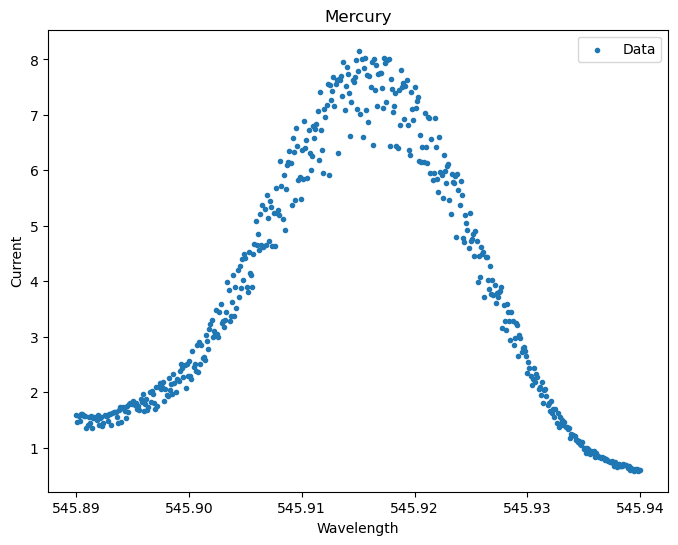

In [2]:
# plot all data 

plt.figure(figsize=(8, 6))
plt.scatter(x_data_m, y_data_m, label='Data', marker='.')
plt.xlabel('Wavelength')
plt.ylabel('Current')
plt.title('Mercury')
plt.legend()
plt.show()

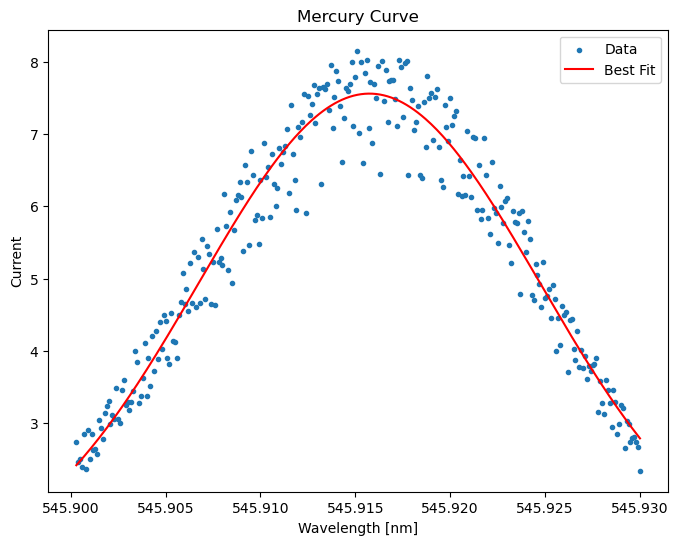

Peak 1 (0.081 MeV):

A1 = 6.68835828 ± 0.31518634
B1 = 545.91574142 ± 0.00006202
C1 = 0.00900771 ± 0.00038161
D = 0.87393753 ± 0.33408648


In [3]:
#x_min = 545.901
#x_max = 545.93
A1 = 7
B1 = 545.91
C1 = 0.01
D = 1

params, covariance = curve_fit(fgaussian, x_data_m_Peak1, y_data_m_Peak1, 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.figure(figsize=(8, 6))
plt.scatter(x_data_m_Peak1, y_data_m_Peak1, label='Data', marker='.')
plt.plot(x_data_m_Peak1, fgaussian(x_data_m_Peak1, *params), label='Best Fit', color='red')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Current')
plt.title('Mercury Curve')
plt.legend()
plt.show()

print('Peak 1 (0.081 MeV):')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

### Full Spectrum 

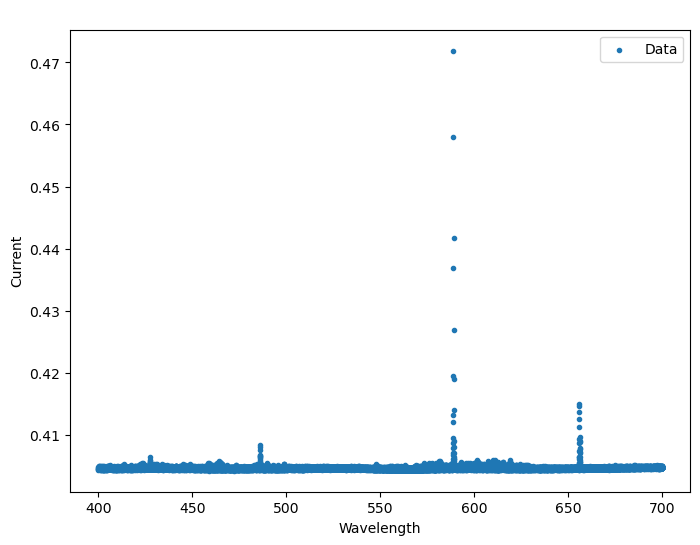

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(x_data_5, y_data_5, label='Data', marker='.')
plt.xlabel('Wavelength')
plt.ylabel('Current')
plt.title(' ')
plt.legend()
plt.show()

### 656.279 nm

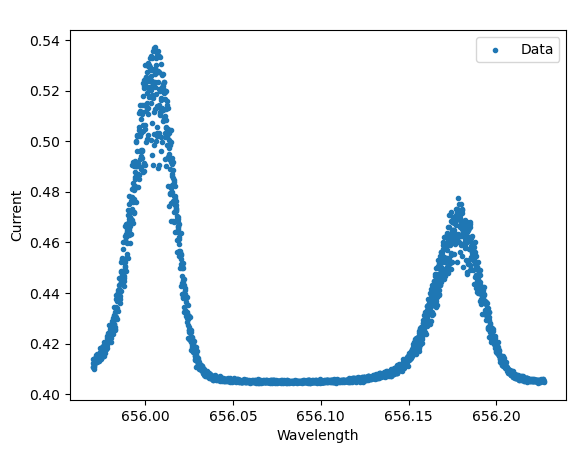

In [5]:
plt.scatter(x_data_1, y_data_1, label='Data', marker='.')
plt.xlabel('Wavelength')
plt.ylabel('Current')
plt.title(' ')
plt.legend()
plt.show() 

##### Peak 1

(655.95, 656.05)

##### Peak 2

(656.10, 656.25)

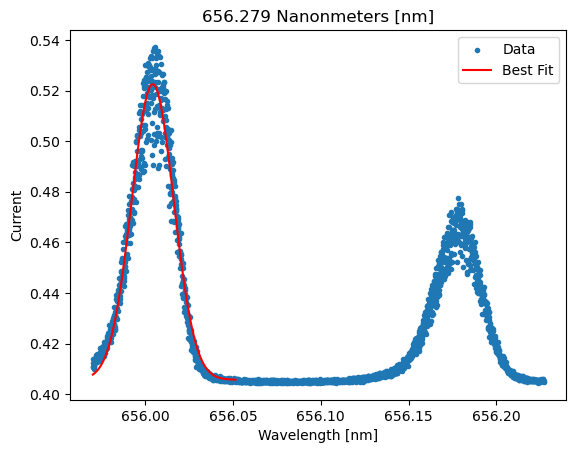

656.279 Nanonmeters [nm]

A1 = 0.11682109 ± 0.00067805
B1 = 656.00413598 ± 0.00006824
C1 = 0.01199412 ± 0.00009666


In [6]:
A1 = 0.54
B1 = 656
C1 = .01
D = 1

params, covariance = curve_fit(fgaussian, x_data_1_peak1, y_data_1_peak1, 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_1, y_data_1, label='Data', marker='.')
plt.plot(x_data_1_peak1, fgaussian(x_data_1_peak1, *params), label='Best Fit', color='red')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Current')
plt.title('656.279 Nanonmeters [nm]')
plt.legend()
plt.show()

print('656.279 Nanonmeters [nm]')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')

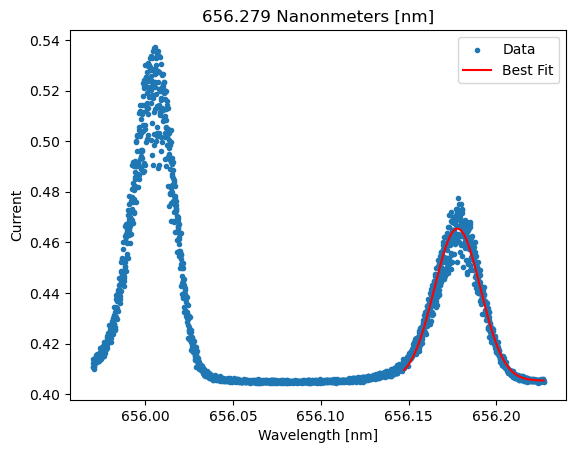

656.279 Nanonmeters [nm]

A1 = 0.06007533 ± 0.00037762
B1 = 656.17789794 ± 0.00007609
C1 = 0.01316435 ± 0.00011315


In [7]:
A1 = 0.54
B1 = 656.156
C1 = .05
D = 1

params, covariance = curve_fit(fgaussian, x_data_1_peak2, y_data_1_peak2, 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_1, y_data_1, label='Data', marker='.')
plt.plot(x_data_1_peak2, fgaussian(x_data_1_peak2, *params), label='Best Fit', color='red')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Current')
plt.title('656.279 Nanonmeters [nm]')
plt.legend()
plt.show()

print('656.279 Nanonmeters [nm]')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')

### 486.135 nm

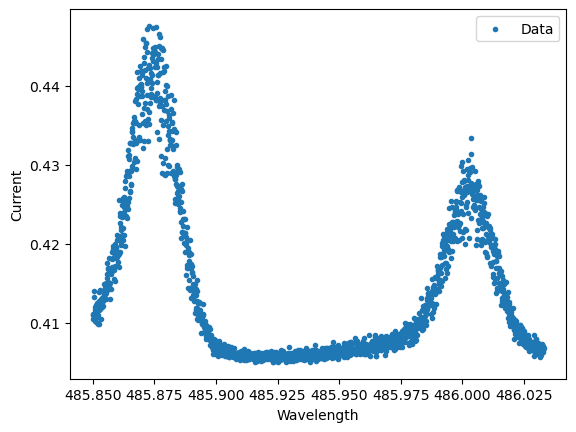

In [8]:
plt.scatter(x_data_2, y_data_2, label='Data', marker='.')
plt.xlabel('Wavelength')
plt.ylabel('Current')
plt.title('')
plt.legend()
plt.show()

##### Peak 1

(485, 485.9)

##### Peak 2

(485.975, 486.025)

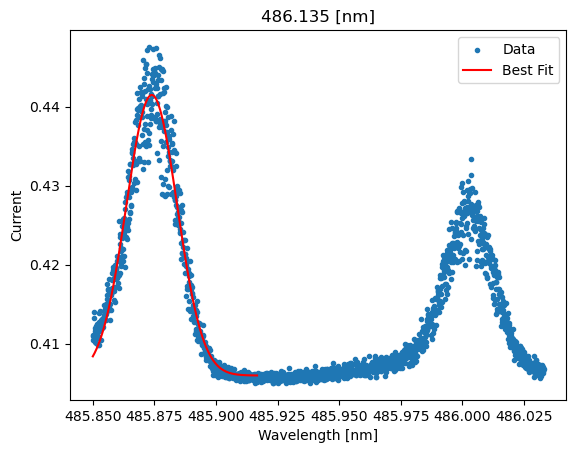

486.135 [nm]

A1 = 0.03550120 ± 0.00025833
B1 = 485.87392625 ± 0.00007253
C1 = -0.01032817 ± 0.00010056


In [9]:
A1 = 0.45
B1 = 485.8
C1 = .05
D = 0

params, covariance = curve_fit(fgaussian, x_data_2_peak1, y_data_2_peak1, 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_2, y_data_2, label='Data', marker='.')
plt.plot(x_data_2_peak1, fgaussian(x_data_2_peak1, *params), label='Best Fit', color='red')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Current')
plt.title('486.135 [nm]')
plt.legend()
plt.show()

print('486.135 [nm]')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')

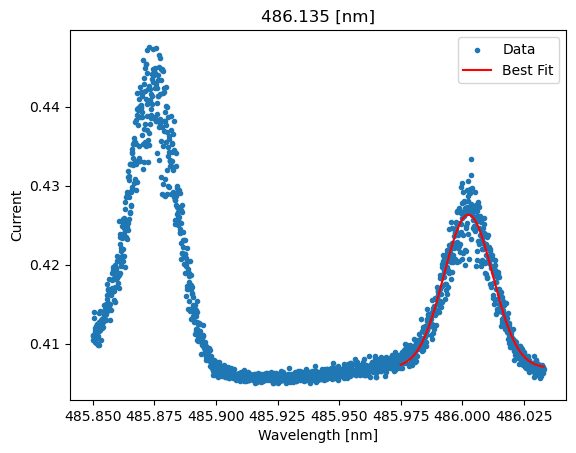

486.135 [nm]

A1 = 0.01939941 ± 0.00020042
B1 = 486.00249349 ± 0.00008774
C1 = -0.00992384 ± 0.00015021


In [10]:
A1 = 0.43
B1 = 486
C1 = .02
D = 0

params, covariance = curve_fit(fgaussian, x_data_2_peak2, y_data_2_peak2, 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_2, y_data_2, label='Data', marker='.')
plt.plot(x_data_2_peak2, fgaussian(x_data_2_peak2, *params), label='Best Fit', color='red')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Current')
plt.title('486.135 [nm]')
plt.legend()
plt.show()

print('486.135 [nm]')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')

### 434.0472 nm

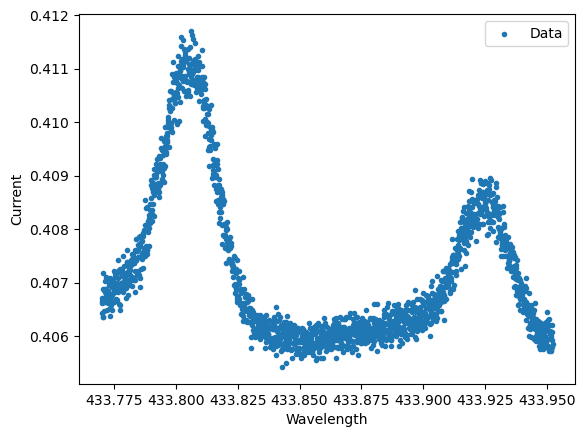

In [11]:
plt.scatter(x_data_3, y_data_3, label='Data', marker='.')
plt.xlabel('Wavelength')
plt.ylabel('Current')
plt.title('')
plt.legend()
plt.show()

##### Peak 1

(433.775, 433.820) 

##### Peak 2

(433.900, 433.950)

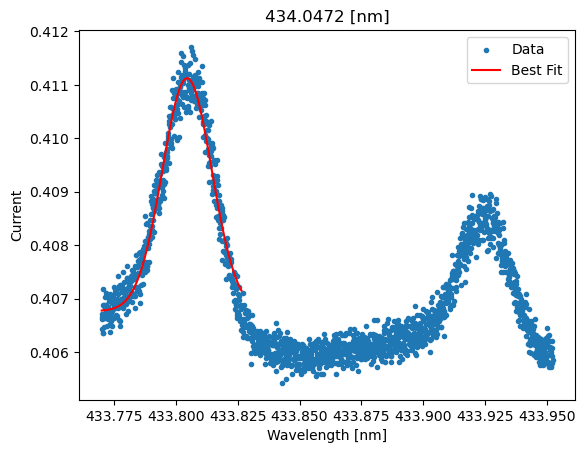

434.0472 [nm]

A1 = 0.00435986 ± 0.00003734
B1 = 433.80452053 ± 0.00007416
C1 = 0.00997645 ± 0.00011759


In [12]:
A1 = 0.412
B1 = 433.8
C1 = .1
D = 0

params, covariance = curve_fit(fgaussian, x_data_3_peak1, y_data_3_peak1, 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_3, y_data_3, label='Data', marker='.')
plt.plot(x_data_3_peak1, fgaussian(x_data_3_peak1, *params), label='Best Fit', color='red')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Current')
plt.title('434.0472 [nm]')
plt.legend()
plt.show()

print('434.0472 [nm]')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')

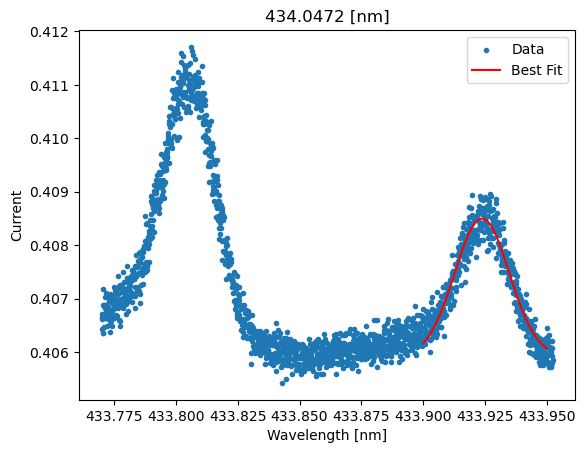

434.0472 [nm]

A1 = 0.00258533 ± 0.00005235
B1 = 433.92375671 ± 0.00010745
C1 = 0.01102500 ± 0.00029061


In [13]:
A1 = 0.43
B1 = 433.925
C1 = .02
D = 0

params, covariance = curve_fit(fgaussian, x_data_3_peak2, y_data_3_peak2, 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_3, y_data_3, label='Data', marker='.')
plt.plot(x_data_3_peak2, fgaussian(x_data_3_peak2, *params), label='Best Fit', color='red')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Current')
plt.title('434.0472 [nm]')
plt.legend()
plt.show()

print('434.0472 [nm]')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')

### 410.1734 nm

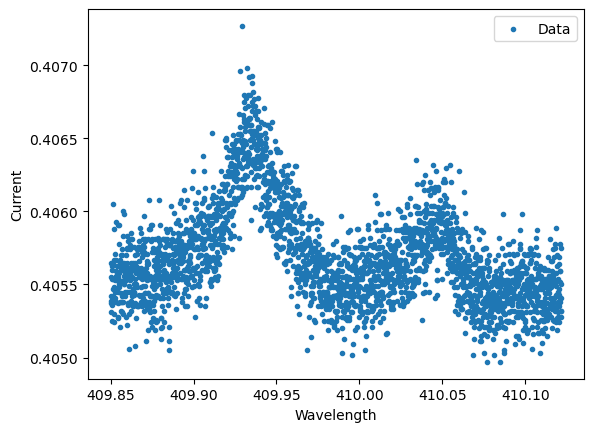

In [14]:
plt.scatter(x_data_4, y_data_4, label='Data', marker='.')
plt.xlabel('Wavelength')
plt.ylabel('Current')
plt.title('')
plt.legend()
plt.show()

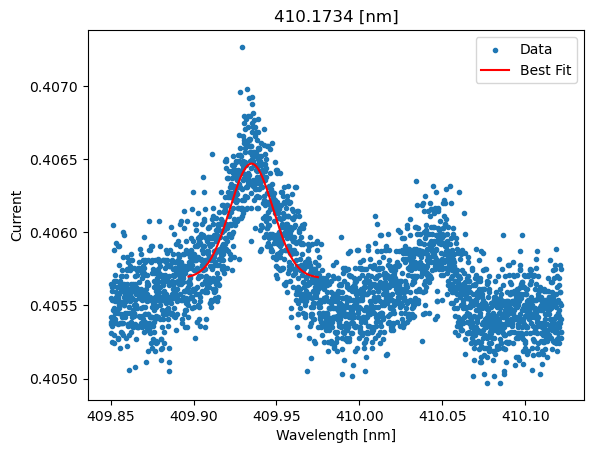

410.1734 [nm]

A1 = 0.00078410 ± 0.00002220
B1 = 409.93494744 ± 0.00032382
C1 = 0.01299440 ± 0.00053964


In [15]:
A1 = 0.407
B1 = 409.925
C1 = .01
D = 0

params, covariance = curve_fit(fgaussian, x_data_4_peak1, y_data_4_peak1, 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_4, y_data_4, label='Data', marker='.')
plt.plot(x_data_4_peak1, fgaussian(x_data_4_peak1, *params), label='Best Fit', color='red')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Current')
plt.title('410.1734 [nm]')
plt.legend()
plt.show()

print('410.1734 [nm]')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')

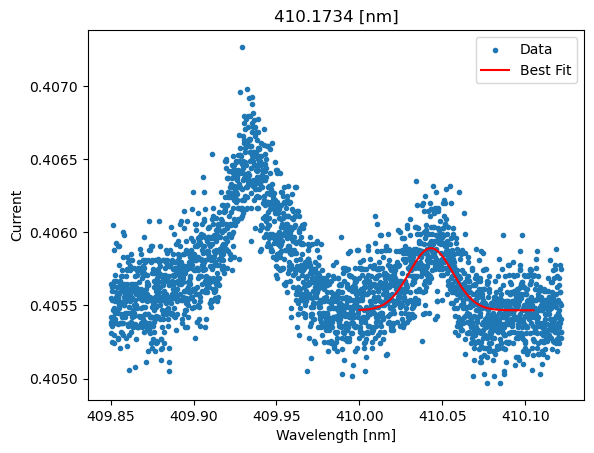

410.1734 [nm]

A1 = 0.00042482 ± 0.00001670
B1 = 410.04316769 ± 0.00053846
C1 = 0.01310418 ± 0.00068792


In [16]:
A1 = 0.43
B1 = 410.05
C1 = .01
D = 0

params, covariance = curve_fit(fgaussian, x_data_4_peak2, y_data_4_peak2, 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_4, y_data_4, label='Data', marker='.')
plt.plot(x_data_4_peak2, fgaussian(x_data_4_peak2, *params), label='Best Fit', color='red')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Current')
plt.title('410.1734 [nm]')
plt.legend()
plt.show()

print('410.1734 [nm]')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')

### Plot

$$ \frac{1}{\lambda} = R \biggl(\frac{1}{2^2} -\frac{1}{n^{2}_{i}} \biggr)$$

$$ y = \frac{1}{\lambda} \hspace{1cm} x = \frac{1}{n^{2}_{i}}$$

$$ y = R \biggl(\frac{1}{2^2} -x \biggr) \rightarrow y = \frac{R}{4} - Rx $$

$ \text{Note: Rydberg Constant for an Infinitely Massive Nucleus}$

$$ R_{\infty} = \frac{1}{hc}\frac{E_0}{2} = \frac{1}{2} \frac{1}{hc} a^2 m_ec^2 = \frac{1}{1240 \text{ eV nm}} \frac{1}{137^2}(0.511\times10^6 \text{ eV}) = 0.01097 \text{ nm}^{-1}$$

$\text{Rydberg Constant for Deuterium and Hydrogen:}$

$$ R_D = \frac{\mu_D}{m_e}R_{\infty}$$

$$ R_H = \frac{\mu_H}{m_e}R_{\infty} $$

You can use these to find the reduced mass/electron mass ratio by dividing the specific Rydberg constant by the Rydberg constant for an infinitely massive nucleus.

$$\text{e.g.} \hspace{1cm} R_D = \frac{\mu_D}{m_e}R_{\infty}$$

$$\frac{\mu_D}{m_e} = \frac{R_{D}}{R_{\infty}}$$



In [28]:
R_inf = 0.01097 # nm^-1

yr = 1/l

i = np.array([1.000224458, 1.000186905,
              1.000228641, 1.000228751]) # indices of refraction

ld = np.array([656.00413598, 485.87392625, 
               433.80452053, 409.93494744]) # wavelengths for deuterium

yd = 1/(ld*i) # y for deuterium 

ud = np.array([0.00006824, 0.00007253, 
               0.00007416, 0.00032382]) # deuterium uncert

lh = np.array([656.17789794, 486.00249349, 
               433.92375671, 410.04316769]) # wavelengths for hydrogen

yh = 1/(lh*i) # y for hydrogen

uh = np.array([0.00007609, 0.00008774, 
               0.00010745, 0.00053846]) # hydrogen uncert

n = np.array([3, 4, 5, 6]) # energy level number

x_n = 1/n**2 # x

yd_u = 1/(i*(ld-ud)) # upper end of the error for deuterium

yh_u = 1/(i*(lh-uh)) # upper end of error for hydrogen 

yd_err = abs(yd - yd_u) # error for y deuterium
yh_err = abs(yh - yh_u) # error for y hydrogen 

print(yd)
print()
print(yd_u)
print()
print(yd_err)
print()
print(yh_err)

[0.00152404 0.00205776 0.00230466 0.00243885]

[0.00152404 0.00205776 0.00230466 0.00243886]

[1.58536198e-10 3.07177492e-10 3.93987427e-10 1.92652562e-09]

[1.76679828e-10 3.71397990e-10 5.70532496e-10 3.20180975e-09]


#### Deuterium 

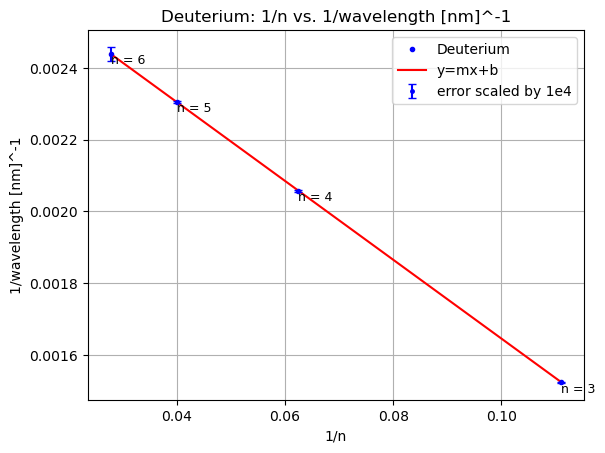

Linear fit: y = (-0.01097763+/-0.00000087)x + (0.00274380+/-0.00000006)


In [39]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x_n, yd)

result = stats.linregress(x_n, yd)

data_labels = ['n = 3', 'n = 4', 
               'n = 5', 'n = 6']

for x, y, label in zip(x_n, yd, data_labels):
    plt.text(x, y, label, fontsize=9, ha='left', va='top')

res = stats.linregress(x_n, yd)
plt.plot(x_n, yd, '.', color='b', label='Deuterium')
plt.plot(x_n, res.intercept + res.slope*x_n, 'r', label='y=mx+b')
plt.errorbar(x_n, yd, yerr=1e4*yd_err, fmt='.', color='b', 
             label='error scaled by 1e4', markersize=5, capsize=3)

plt.xlabel('1/n')
plt.ylabel('1/wavelength [nm]^-1')
plt.title('Deuterium: 1/n vs. 1/wavelength [nm]^-1')
plt.grid(True)
plt.legend()
plt.show()

# chi_sq = np.sum((yd-(res.intercept+res.slope*x_n))**2/yd_err**2)

print(f"Linear fit: y = ({res.slope:.8f}+/-{result.stderr:.8f})x + ({res.intercept:.8f}+/-{result.intercept_stderr:.8f})")
#print()
#print(f'Chi-squared: {chi_sq}')

In [42]:
Rd = 0.01097763 # nm^-1
sigma_Rd = 0.00000087
Rd_r = 0.999728

print(f'Rydberg constant for Deuterium: {Rd}')
print()
print(f'Calculated reduced mass/electron mass ratio: {Rd/R_inf}')
print()
print(f'Actual reduced mass/electron mass ratio: {Rd_r}')
print()
print(f'Absolute error for reduced mass/electron mass ratio: {abs(Rd - Rd_r)}')

Rydberg constant for Deuterium: 0.01097763

Calculated reduced mass/electron mass ratio: 1.0006955332725616

Actual reduced mass/electron mass ratio: 0.999728

Absolute error for reduced mass/electron mass ratio: 0.98875037


#### Hydrogen 

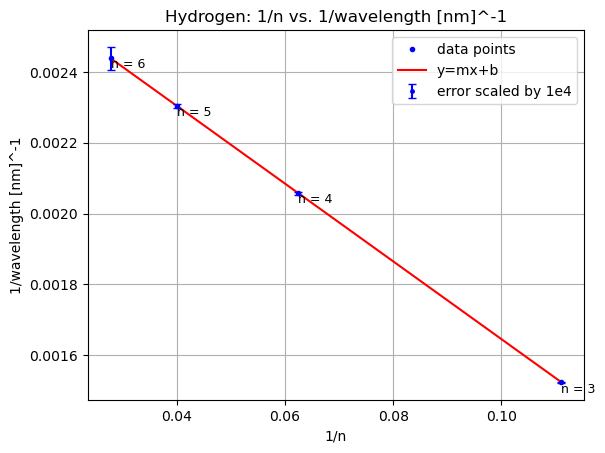

Linear fit: y = (-0.01097462+/-0.00000100)x + (0.00274306+/-0.00000007)


In [43]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x_n, yh)

result = stats.linregress(x_n, yh)

data_labels = ['n = 3', 'n = 4', 
               'n = 5', 'n = 6']

for x, y, label in zip(x_n, yh, data_labels):
    plt.text(x, y, label, fontsize=9, ha='left', va='top')

res = stats.linregress(x_n, yh)
plt.plot(x_n, yh, '.', color='blue', label='data points')
plt.plot(x_n, res.intercept + res.slope*x_n, 'r', label='y=mx+b')
plt.errorbar(x_n, yh, yerr=1e4*yh_err, fmt='.', color='blue', 
             label='error scaled by 1e4', markersize=5, capsize=3)

plt.xlabel('1/n')
plt.ylabel('1/wavelength [nm]^-1')
plt.title('Hydrogen: 1/n vs. 1/wavelength [nm]^-1')
plt.grid(True)
plt.legend()
plt.show()

print(f"Linear fit: y = ({res.slope:.8f}+/-{result.stderr:.8f})x + ({res.intercept:.8f}+/-{result.intercept_stderr:.8f})")

In [44]:
Rh = 0.01097462 # nm^-1
sigma_Rh = 0.00000100
Rh_r = 0.999457

print(f'Rydberg constant for Hydrogen: {Rh}')
print()
print(f'Reduced mass/electron mass ratio: {Rh/R_inf}')
print()
print(f'Actual reduced mass/electron mass ratio: {0.999457}')
print()
print(f'Absolute error for reduced mass/electron mass ratio: {abs(Rh - Rh_r)}')

Rydberg constant for Hydrogen: 0.01097462

Reduced mass/electron mass ratio: 1.0004211485870556

Actual reduced mass/electron mass ratio: 0.999457

Absolute error for reduced mass/electron mass ratio: 0.98848238
